In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [183]:
titanic_df = pd.read_csv("titanic_train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. 결측치

In [184]:
titanic_df.info()
# rangeindex : 전체 로우수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [185]:
# 결측치 대체 fillna
titanic_df["Age"].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print(titanic_df.isnull().sum().sum())

0


In [186]:
print(titanic_df.Sex.value_counts())
print(titanic_df.Cabin.value_counts())
print(titanic_df.Embarked.value_counts())

male      577
female    314
Name: Sex, dtype: int64
N              687
B96 B98          4
C23 C25 C27      4
G6               4
F2               3
              ... 
C45              1
E58              1
D47              1
C82              1
E36              1
Name: Cabin, Length: 148, dtype: int64
S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [187]:
#문자열 추출 str
titanic_df.Cabin=titanic_df.Cabin.str[:1]
print(titanic_df.Cabin.head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


# 2. EDA

In [188]:
# 성별 -> 생존 확률
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex,Survived'>

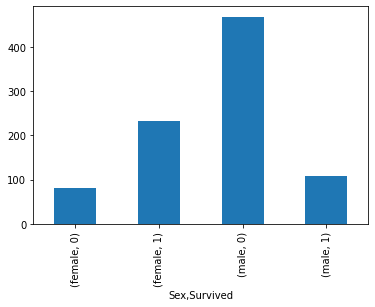

In [20]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count().plot.bar()

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

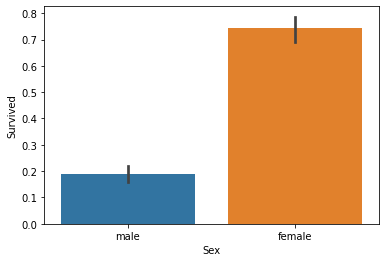

In [189]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

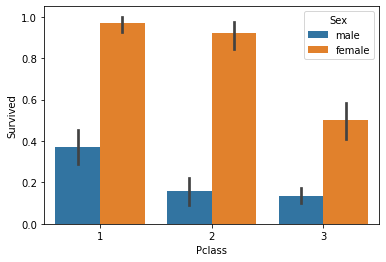

In [190]:
# 성별, pclass -> 생존 확률
sns.barplot(x='Pclass', y='Survived',hue="Sex", data=titanic_df)

In [191]:
# 연령, 성별 -> 생존 확률
titanic_df.Age.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [192]:
def get_category(age):
    cat=''
    if age<=-1 : cat = 'Unknown'
    elif age<=5 : cat = 'Baby'
    elif age<=12 : cat = 'Child'
    elif age<=18 : cat = 'Teenager'
    elif age<=25 : cat = 'Student'
    elif age<=35 : cat = 'Young Adult'
    elif age<=60 : cat = 'Adult'
    else : cat = 'Elderly'
        
    return cat

In [193]:
titanic_df["Age_cat"]=titanic_df["Age"].apply(lambda x : get_category(x))
titanic_df["Age_cat"].head()

0        Student
1          Adult
2    Young Adult
3    Young Adult
4    Young Adult
Name: Age_cat, dtype: object

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

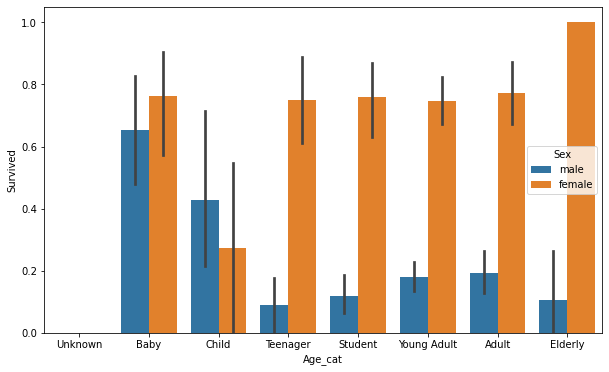

In [194]:
plt.figure(figsize=(10,6))
group_names = ['Unknown', 'Baby', 'Child' ,'Teenager','Student', 'Young Adult', 'Adult', 'Elderly']
sns.barplot(x="Age_cat", y="Survived", hue='Sex', data=titanic_df, order=group_names)

In [195]:
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [196]:
# 레이블 인코딩 (Cabin, Sex, Embarked)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [197]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Embarked', 'Sex']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [198]:
# null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Embarked', 'Sex']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

# 3. 머신러닝

In [200]:
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [201]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size=0.2, random_state=11)

In [159]:
# 결정 트리, 랜덤 포레스트, 로지스틱 회귀 / 예측 성능 평가 : 정확도

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [208]:
dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print(accuracy_score(y_test, dt_pred))

rf_clf = RandomForestClassifier(random_state=11)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print(accuracy_score(y_test, rf_pred))

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print(accuracy_score(y_test, lr_pred))

0.7877094972067039
0.8547486033519553
0.8491620111731844


C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7877094972067039
0.8547486033519553
0.8491620111731844


In [209]:
# 교차 검증
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores=[]
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
        
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))
    
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [222]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5, scoring='accuracy')
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))
    
print("평균정확도 : {0: .4f}".format(np.mean(scores)))

교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7753
교차 검증 2 정확도 : 0.7921
교차 검증 3 정확도 : 0.7865
교차 검증 4 정확도 : 0.8427
평균정확도 :  0.7879


In [226]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2,3,5,10],
             'min_samples_split' : [2,3,5],
             'min_samples_leaf' : [1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print(grid_dclf.best_params_)
print(grid_dclf.best_score_)
best_dclf = grid_dclf.best_estimator_

{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.7991825076332119


In [181]:
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print(accuracy)

0.8715083798882681
